In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Kaggle-Titanic-Project/'

/content/gdrive/MyDrive/Colab Notebooks/Kaggle-Titanic-Project


In [3]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
train_dataset = pd.read_csv('input/train.csv')
test_dataset = pd.read_csv('input/test.csv')

train_data = train_dataset.drop("Survived", axis=1)
whole_dataset = pd.concat([train_data, test_dataset], axis=0)

In [4]:
whole_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
whole_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [6]:
whole_dataset.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
whole_dataset.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [8]:
whole_dataset.drop(["Ticket","Cabin"], axis=1, inplace=True)

In [9]:
whole_dataset["Embarked"] = whole_dataset["Embarked"].fillna("S")
whole_dataset["Fare"] = whole_dataset["Fare"].fillna(whole_dataset["Fare"].median())

In [10]:
whole_dataset['Title'] = whole_dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_dataset['Title'] = train_dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
whole_dataset.drop("Name",axis=1,inplace=True)
train_dataset.drop("Name",axis=1,inplace=True)

In [11]:
title_mapping = {"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Other", "Dr":"Other", "Rev":"Other", "Col": "Other", 
                 "Major": "Other", "Mlle": "Other","Countess": "Other", "Ms": "Other", "Lady": "Other", "Jonkheer": "Other", 
                 "Don": "Other", "Dona" : "Other", "Mme": "Other","Capt": "Other","Sir": "Other" }
whole_dataset['Title'] = whole_dataset['Title'].map(title_mapping)
train_dataset['Title'] = train_dataset['Title'].map(title_mapping)

In [12]:
whole_dataset["FamilySize"] = whole_dataset["SibSp"] + whole_dataset["Parch"] + 1

In [13]:
whole_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   object 
 3   Age          1046 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Embarked     1309 non-null   object 
 8   Title        1309 non-null   object 
 9   FamilySize   1309 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 112.5+ KB


In [14]:
whole_dataset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,3,male,22.0,1,0,7.2500,S,Mr,2
1,2,1,female,38.0,1,0,71.2833,C,Mrs,2
2,3,3,female,26.0,0,0,7.9250,S,Miss,1
3,4,1,female,35.0,1,0,53.1000,S,Mrs,2
4,5,3,male,35.0,0,0,8.0500,S,Mr,1


In [15]:
pclass_band = train_dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass', ascending=True)
pclass_mapping = dict(pclass_band.values)
whole_dataset["Pclass"] = whole_dataset["Pclass"].map(pclass_mapping)
pclass_band

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
sex_band = train_dataset[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=True)
sex_mapping = dict(sex_band.values)
whole_dataset["Sex"] = whole_dataset["Sex"].map(sex_mapping)
sex_band

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
embarked_band = train_dataset[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Embarked', ascending=True)
embarked_mapping = dict(embarked_band.values)
whole_dataset["Embarked"] = whole_dataset["Embarked"].map(embarked_mapping)
embarked_band

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [18]:
title_band = train_dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Title', ascending=True)
title_mapping = dict(title_band.values)
whole_dataset["Title"] = whole_dataset["Title"].map(title_mapping)
title_band

,Title,Survived
0,Miss,0.697802
1,Mr,0.156673
2,Mrs,0.792000
3,Other,0.522388


In [19]:
fill_data = whole_dataset.drop(["PassengerId"], axis=1)
fill_train_data = fill_data[~fill_data["Age"].isnull()]
fill_train_label = fill_train_data["Age"]
fill_train_data.drop("Age", axis=1, inplace=True)
fill_test_data = fill_data[fill_data["Age"].isnull()]
fill_test_data.drop("Age", axis=1, inplace=True)

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(fill_train_data, fill_train_label)
fill_test_age = lr.predict(fill_test_data)
fill_test_age[fill_test_age < 0] = 0
whole_dataset["Age"][whole_dataset["Age"].isnull()] = fill_test_age

In [21]:
whole_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   float64
 2   Sex          1309 non-null   float64
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Embarked     1309 non-null   float64
 8   Title        1309 non-null   float64
 9   FamilySize   1309 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 112.5 KB


In [22]:
whole_dataset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0.242363,0.188908,22.0,1,0,7.2500,0.336957,0.156673,2
1,2,0.629630,0.742038,38.0,1,0,71.2833,0.553571,0.792000,2
2,3,0.242363,0.742038,26.0,0,0,7.9250,0.336957,0.697802,1
3,4,0.629630,0.742038,35.0,1,0,53.1000,0.336957,0.792000,2
4,5,0.242363,0.188908,35.0,0,0,8.0500,0.336957,0.156673,1


In [23]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
whole_dataset.drop('PassengerId', axis=1, inplace=True)
whole_dataset = standard_scaler.fit_transform(whole_dataset)

In [24]:
labeled_data = whole_dataset[:len(train_dataset)]
unlabeled_data = whole_dataset[len(train_dataset):]
labels = train_dataset["Survived"]

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

training_data, validation_data, training_label, validation_label = train_test_split(labeled_data, labels, test_size=0.20, stratify=labels, random_state=42)
print("train_shape: ", training_data.shape)
print("test_shape: ", validation_data.shape)

train_shape:  (712, 9)
test_shape:  (179, 9)


In [30]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=[9]))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
callback1 = EarlyStopping(restore_best_weights=True, monitor='val_loss', patience=5, verbose=1)
history = model.fit(training_data, training_label, validation_data=(validation_data, validation_label), callbacks=[callback1], epochs=30, verbose=2)

Epoch 1/30
23/23 - 1s - loss: 0.7090 - accuracy: 0.5463 - val_loss: 0.6602 - val_accuracy: 0.6536
Epoch 2/30
23/23 - 0s - loss: 0.6018 - accuracy: 0.7065 - val_loss: 0.6312 - val_accuracy: 0.7095
Epoch 3/30
23/23 - 0s - loss: 0.5538 - accuracy: 0.7570 - val_loss: 0.5933 - val_accuracy: 0.7821
Epoch 4/30
23/23 - 0s - loss: 0.5224 - accuracy: 0.7697 - val_loss: 0.5549 - val_accuracy: 0.7821
Epoch 5/30
23/23 - 0s - loss: 0.4840 - accuracy: 0.7907 - val_loss: 0.5353 - val_accuracy: 0.8045
Epoch 6/30
23/23 - 0s - loss: 0.5177 - accuracy: 0.7683 - val_loss: 0.5212 - val_accuracy: 0.8045
Epoch 7/30
23/23 - 0s - loss: 0.4797 - accuracy: 0.7921 - val_loss: 0.5005 - val_accuracy: 0.8045
Epoch 8/30
23/23 - 0s - loss: 0.4527 - accuracy: 0.8076 - val_loss: 0.4894 - val_accuracy: 0.8101
Epoch 9/30
23/23 - 0s - loss: 0.4774 - accuracy: 0.8020 - val_loss: 0.4772 - val_accuracy: 0.8212
Epoch 10/30
23/23 - 0s - loss: 0.4539 - accuracy: 0.8146 - val_loss: 0.4668 - val_accuracy: 0.8156
Epoch 11/30
23/23 -

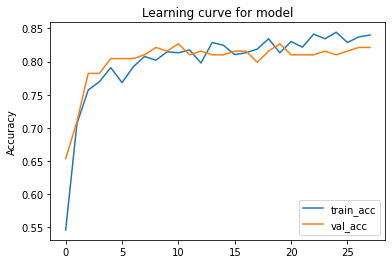

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label='train_acc')
plt.plot(history.history["val_accuracy"], label='val_acc')
plt.title('Learning curve for model')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

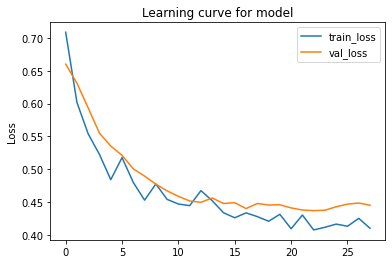

In [32]:
plt.plot(history.history["loss"], label='train_loss')
plt.plot(history.history["val_loss"], label='val_loss')
plt.title('Learning curve for model')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
prediction = model.predict_classes(unlabeled_data).flatten()
test_id = test_dataset["PassengerId"]
submission = pd.DataFrame({"PassengerId": test_id,"Survived": prediction})
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
